In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
import nltk

from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
# !pip install pywaffle
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('omw-1.4')

You should consider upgrading via the 'C:\Users\luca5\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luca5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luca5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\luca5\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luca5\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\luca5\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/course/NLP/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

import getdata



In [3]:
train = getdata.create_train_dataframes()
train.head()

,Text,Author,ID
Id,,,
id26305,"This process, however, afforded me no means of...",EAP,26305
id17569,It never once occurred to me that the fumbling...,HPL,17569
id11008,"In his left hand was a gold snuff box, from wh...",EAP,11008
id27763,How lovely is spring As we looked from Windsor...,MWS,27763
id12958,"Finding nothing else, not even gold, the Super...",HPL,12958


In [4]:
fear_count = train.loc[train['Text'].str.contains('fear')].groupby(by=['Author']).count()['Text']
print(fear_count)

Author
EAP     70
HPL    160
MWS    211
Name: Text, dtype: int64


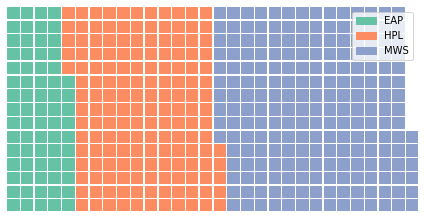

In [5]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=15,  # Either rows or columns could be omitted
    values=fear_count,  # Pass a list of integers to values
    legend={'labels': list(fear_count.index)}
)
fig.savefig("plot.png", bbox_inches="tight")

In [6]:
horror_count = train.loc[train['Text'].str.contains('horror')].groupby(by=['Author']).count()['Text']
print(horror_count)

Author
EAP     58
HPL    105
MWS     59
Name: Text, dtype: int64


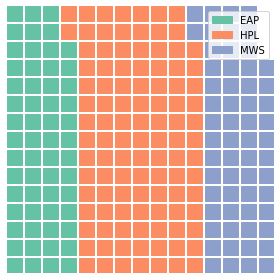

In [7]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=15,  # Either rows or columns could be omitted
    values=horror_count,  # Pass a list of integers to values
    legend={'labels': list(horror_count.index)}
)
fig.savefig("plot.png", bbox_inches="tight")

In [8]:
authors = train.Author.unique()

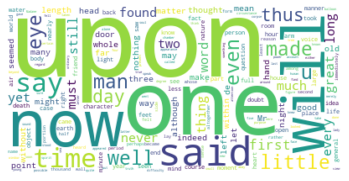

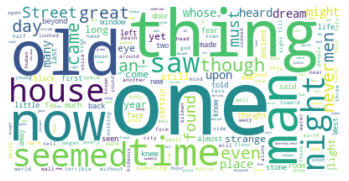

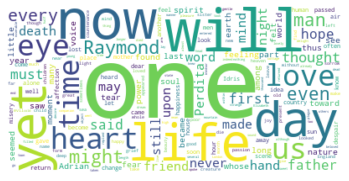

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for author in authors:
    text = train.loc[train['Author']==author]['Text']
    wc = WordCloud(collocations = False, background_color = 'white').generate(' '.join(text))

    fig = plt.figure()

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

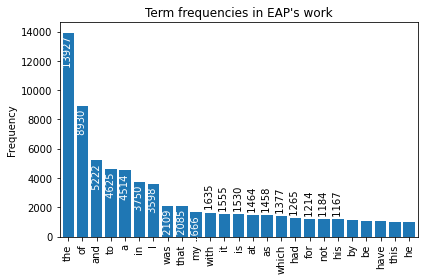

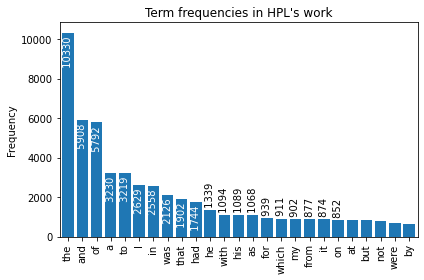

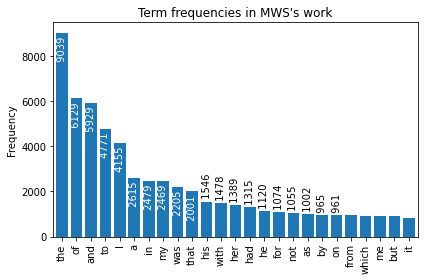

In [10]:
from collections import Counter
for author in authors:
    words = ' '.join(train.loc[train['Author']==author]['Text']).split(' ')
    tf = Counter(words)
    y = [count for tag, count in tf.most_common(25)]
    x = [tag for tag, count in tf.most_common(25)]
    plt.bar(x, y)
    plt.title(f"Term frequencies in {author}'s work")
    plt.ylabel("Frequency") # (log scale)
#     plt.yscale('log') # optionally set a log scale for the y-axis
    plt.xticks(rotation=90)
    for i, (tag, count) in enumerate(tf.most_common(20)):
        plt.text(i, count, f' {count} ', rotation=90,
                 ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
    plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
    plt.tight_layout() # change the whitespace such that all labels fit nicely
    plt.show()

In [11]:
tokenized_text = train.Text.apply(word_tokenize)

In [12]:
stop = stopwords.words('english')
clean_train = train.copy()
tokenized_text = train.Text.apply(lambda x: word_tokenize(x))
tokenized_text = tokenized_text.apply(lambda x: [word for word in x if word.lower() not in (stop) and word.isalpha()])
clean_train['Text'] = tokenized_text

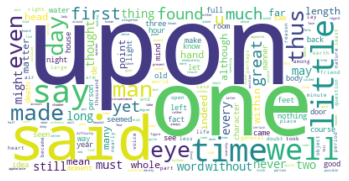

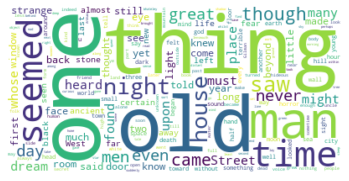

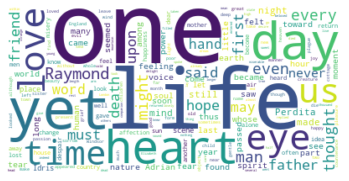

In [13]:
from collections import Counter
for author in authors:
    words = clean_train.loc[clean_train['Author']==author]['Text'].sum() # .sum() to concatenate all lists
    
    wc = WordCloud(collocations = False, background_color = 'white').generate(' '.join(words))

    fig = plt.figure()

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

In [14]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

for word in ["women","daughters", "leaves"]:
    print("The lemmatized form of %s is: {}".format(lemm.lemmatize(word)) % word)

The lemmatized form of women is: woman
The lemmatized form of daughters is: daughter
The lemmatized form of leaves is: leaf


In [15]:
clean_train.Text.apply(lambda x: [lemm.lemmatize(word) for word in x])

Id
id26305    [process, however, afforded, mean, ascertainin...
id17569    [never, occurred, fumbling, might, mere, mistake]
id11008    [left, hand, gold, snuff, box, capered, hill, ...
id27763    [lovely, spring, looked, Windsor, Terrace, six...
id12958    [Finding, nothing, else, even, gold, Superinte...
                                 ...                        
id17718    [could, fancied, looked, eminent, landscape, p...
id08973                     [lid, clenched, together, spasm]
id05267    [Mais, il, faut, agir, say, Frenchman, never, ...
id17513      [item, news, like, strike, u, coolly, received]
id00393    [laid, gnarled, claw, shoulder, seemed, shakin...
Name: Text, Length: 19579, dtype: object

In [16]:
print(train.Text)

Id
id26305    This process, however, afforded me no means of...
id17569    It never once occurred to me that the fumbling...
id11008    In his left hand was a gold snuff box, from wh...
id27763    How lovely is spring As we looked from Windsor...
id12958    Finding nothing else, not even gold, the Super...
                                 ...                        
id17718    I could have fancied, while I looked at it, th...
id08973    The lids clenched themselves together as if in...
id05267    Mais il faut agir that is to say, a Frenchman ...
id17513    For an item of news like this, it strikes us i...
id00393    He laid a gnarled claw on my shoulder, and it ...
Name: Text, Length: 19579, dtype: object


In [17]:
print(clean_train.Text)

Id
id26305    [process, however, afforded, means, ascertaini...
id17569    [never, occurred, fumbling, might, mere, mistake]
id11008    [left, hand, gold, snuff, box, capered, hill, ...
id27763    [lovely, spring, looked, Windsor, Terrace, six...
id12958    [Finding, nothing, else, even, gold, Superinte...
                                 ...                        
id17718    [could, fancied, looked, eminent, landscape, p...
id08973                    [lids, clenched, together, spasm]
id05267    [Mais, il, faut, agir, say, Frenchman, never, ...
id17513    [item, news, like, strikes, us, coolly, received]
id00393    [laid, gnarled, claw, shoulder, seemed, shakin...
Name: Text, Length: 19579, dtype: object


In [18]:
def clean_text(text, remove_stop_words=False):
    cleaned_text = text.apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
    if remove_stop_words:
        cleaned_text = text.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))
        
    cleaned_text.apply(lambda x: ' '.join([lemm.lemmatize(word) for word in x.split()]))
    return cleaned_text

cleaned_text = clean_text(train.Text)
# you don't HAVE to remove stop words before using tf-idf, either the function can do it already
# or stop words won't even have semantic meaning with tf-idf because of their frequent nature

In [19]:
print(cleaned_text)

Id
id26305    This afforded me no means of ascertaining the ...
id17569    It never once occurred to me that the fumbling...
id11008    In his left hand was a gold snuff from as he c...
id27763    How lovely is spring As we looked from Windsor...
id12958    Finding nothing not even the Superintendent ab...
                                 ...                        
id17718    I could have while I looked at that some emine...
id08973     The lids clenched themselves together as if in a
id05267    Mais il faut agir that is to a Frenchman never...
id17513    For an item of news like it strikes us it was ...
id00393    He laid a gnarled claw on my and it seemed to ...
Name: Text, Length: 19579, dtype: object


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(cleaned_text)

In [21]:
tfidf.get_feature_names_out()
# abandon_terms = cleaned

array(['ab', 'aback', 'abandon', ..., 'zopyrus', 'zubmizzion', 'zuro'],
      dtype=object)

In [22]:
tfidf_df = pd.DataFrame(tfs.toarray(), index=cleaned_text.index.values, columns=tfidf.get_feature_names())
tfidf_df.loc['Document Frequency'] = (tfidf_df > 0).sum()
print(tfidf_df)

C:\Users\luca5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


                     ab  aback  abandon  abandoned  abandoning  abandonment  \
id26305             0.0    0.0      0.0   0.000000         0.0          0.0   
id17569             0.0    0.0      0.0   0.000000         0.0          0.0   
id11008             0.0    0.0      0.0   0.000000         0.0          0.0   
id27763             0.0    0.0      0.0   0.000000         0.0          0.0   
id12958             0.0    0.0      0.0   0.268237         0.0          0.0   
...                 ...    ...      ...        ...         ...          ...   
id08973             0.0    0.0      0.0   0.000000         0.0          0.0   
id05267             0.0    0.0      0.0   0.000000         0.0          0.0   
id17513             0.0    0.0      0.0   0.000000         0.0          0.0   
id00393             0.0    0.0      0.0   0.000000         0.0          0.0   
Document Frequency  1.0    2.0     10.0  24.000000         2.0          4.0   

                    abaout  abashed  abashment  aba

In [23]:
tfidf_df.loc[tfidf_df['abandoned'] > 0].index

Index(['id12958', 'id27182', 'id04520', 'id03532', 'id14782', 'id13314',
       'id23065', 'id19946', 'id25640', 'id10505', 'id10878', 'id07417',
       'id11876', 'id04084', 'id25307', 'id24542', 'id07804', 'id04920',
       'id04627', 'id03590', 'id13718', 'id13203', 'id24491', 'id13610',
       'Document Frequency'],
      dtype='object')

In [24]:
tfidf_df['Author'] = train['Author']
print(tfidf_df)

                     ab  aback  abandon  abandoned  abandoning  abandonment  \
id26305             0.0    0.0      0.0   0.000000         0.0          0.0   
id17569             0.0    0.0      0.0   0.000000         0.0          0.0   
id11008             0.0    0.0      0.0   0.000000         0.0          0.0   
id27763             0.0    0.0      0.0   0.000000         0.0          0.0   
id12958             0.0    0.0      0.0   0.268237         0.0          0.0   
...                 ...    ...      ...        ...         ...          ...   
id08973             0.0    0.0      0.0   0.000000         0.0          0.0   
id05267             0.0    0.0      0.0   0.000000         0.0          0.0   
id17513             0.0    0.0      0.0   0.000000         0.0          0.0   
id00393             0.0    0.0      0.0   0.000000         0.0          0.0   
Document Frequency  1.0    2.0     10.0  24.000000         2.0          4.0   

                    abaout  abashed  abashment  aba

In [25]:
tfidf_df.nlargest(50, 'fear').groupby(by='Author').count()

,ab,aback,abandon,abandoned,abandoning,abandonment,abaout,abashed,abashment,abatement,...,zircon,zit,zobna,zobnarian,zodiacal,zokkar,zone,zopyrus,zubmizzion,zuro
Author,,,,,,,,,,,,,,,,,,,,,
EAP,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
HPL,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
MWS,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [26]:
list_fear = tfidf_df.nlargest(50, 'fear')

In [27]:
print(list_fear)

                     ab  aback  abandon  abandoned  abandoning  abandonment  \
Document Frequency  1.0    2.0     10.0       24.0         2.0          4.0   
id19372             0.0    0.0      0.0        0.0         0.0          0.0   
id21042             0.0    0.0      0.0        0.0         0.0          0.0   
id14687             0.0    0.0      0.0        0.0         0.0          0.0   
id09720             0.0    0.0      0.0        0.0         0.0          0.0   
id09240             0.0    0.0      0.0        0.0         0.0          0.0   
id09809             0.0    0.0      0.0        0.0         0.0          0.0   
id19365             0.0    0.0      0.0        0.0         0.0          0.0   
id07978             0.0    0.0      0.0        0.0         0.0          0.0   
id11122             0.0    0.0      0.0        0.0         0.0          0.0   
id14398             0.0    0.0      0.0        0.0         0.0          0.0   
id13456             0.0    0.0      0.0        0.0  

In [28]:
print(list_fear[['fear', 'Author']])

                          fear Author
Document Frequency  172.000000    NaN
id19372               0.648310    EAP
id21042               0.638554    MWS
id14687               0.572116    EAP
id09720               0.545739    EAP
id09240               0.524932    EAP
id09809               0.514047    EAP
id19365               0.505672    MWS
id07978               0.427096    MWS
id11122               0.427000    MWS
id14398               0.399313    EAP
id13456               0.378165    HPL
id19415               0.372567    HPL
id07777               0.363199    HPL
id15241               0.361256    MWS
id18643               0.348259    HPL
id08303               0.343997    MWS
id18903               0.332583    MWS
id03310               0.329267    MWS
id06062               0.328877    HPL
id13382               0.324536    HPL
id07073               0.317280    HPL
id26750               0.317138    EAP
id14881               0.313317    HPL
id08820               0.308174    MWS
id20407     

In [29]:
print(train.loc['id21042'])

Text      "And now I do not fear death.
Author                              MWS
ID                                21042
Name: id21042, dtype: object


In [30]:
list_fear = list_fear.drop('Document Frequency')
print(train.loc[list_fear.index[:9]]['Text'].values)

['Be of heart and fear nothing.' '"And now I do not fear death.'
 '"Perhaps so," said I; "but, Legrand, I fear you are no artist.'
 'Indeed I had no fear on her account.'
 'I have not the slightest fear for the result.'
 '"I fear you are right there," said the Prefect.'
 'We could not fear we did not.'
 '"This is kind," she cried; "this is noble, my own beloved O fear not disgrace or lowly fortune, while you have your Perdita; fear not sorrow, while our child lives and smiles.'
 'I had gazed with wonder, mixed with fear and enthusiasm.']


In [31]:
import nltk
nltk.download('genesis')
nltk.corpus.genesis.words('english-web.txt')

[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\luca5\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!


['In', 'the', 'beginning', 'God', 'created', 'the', ...]

In [32]:
from nltk.text import Text
text_corpus = Text(clean_train['Text'].sum())
text_corpus.concordance('fear')

Displaying 25 of 241 matches:
 alarmed chicken certainly Perpetual fear jaundiced complexion shrivelled whol
nclined silent though holding secret fear still appeared public together lived
ction undisturbed together unchecked fear opened heart fullest delight nothing
cupied pleasantly remained paralysed fear found voice dying breath screamed fo
claws enticements sufficient conquer fear danger death induce commence laborio
 grandmother moment almost paralized fear energy returned demanded guide accom
ne much feared unknown horror sought fear thought telling anybody weep sigh mu
g usual result went open light heart fear reason priori diddle would diddle wi
tle moodily evident effort paralysis fear stifled attempts cry say never bodil
loud quick unequal spoken apparently fear well anger said unintelligible words
 Geneva seemed resolved give scruple fear wind given information Tillinghast r
s lacked something lacked longer yet fear hatred ignorance still brood Street 
lready decided abandon

In [33]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(clean_train['Text'].sum())

finder.nbest(bigram_measures.likelihood_ratio, 10)

[('old', 'man'),
 ('New', 'York'),
 ('main', 'compartment'),
 ('years', 'ago'),
 ('Let', 'us'),
 ('Lord', 'Raymond'),
 ('Chess', 'Player'),
 ('Madame', 'Lalande'),
 ('Tempest', 'Mountain'),
 ('Brown', 'Jenkin')]

In [34]:
finder.apply_freq_filter(5)
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('old', 'man'),
 ('New', 'York'),
 ('main', 'compartment'),
 ('years', 'ago'),
 ('Let', 'us'),
 ('Lord', 'Raymond'),
 ('Chess', 'Player'),
 ('Madame', 'Lalande'),
 ('Tempest', 'Mountain'),
 ('Brown', 'Jenkin')]

In [35]:
finder.apply_freq_filter(5)
finder.nbest(bigram_measures.jaccard, 10)

[('Chess', 'Player'),
 ('Ooth', 'Nargai'),
 ('Sona', 'Nyl'),
 ('Ourang', 'Outang'),
 ('Yog', 'Sothoth'),
 ('Brevet', 'Brigadier'),
 ('Bas', 'Bleu'),
 ('Clapham', 'Lee'),
 ('Cotton', 'Mather'),
 ('Brown', 'Jenkin')]

In [36]:
love_filter = lambda *w: 'love' not in w
finder.apply_ngram_filter(love_filter)
finder.nbest(bigram_measures.jaccard, 10)

[('love', 'hope'), ('love', 'love'), ('love', 'first'), ('love', 'life')]

In [37]:
fear_filter = lambda *w: 'fear' not in w
finder.apply_ngram_filter(fear_filter)
finder.nbest(bigram_measures.jaccard, 10)

[]